In [22]:
# open csv file in pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [23]:
data = pd.read_csv('data.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [24]:
%pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Clean Data
# Forming categorical columns
col_name_without_numeric_data = list(data.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')
# Let's see the duplicates in the columns
for col in col_name_without_numeric_data:
    if data[col].duplicated().any() == True:
        print (f'Column {col} contains duplicates.')
    else:
        print (f'Column {col} does not contain duplicates.')
# Check if spelling errors have been hit
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(data[col]))} After {col}: {len(set(data[col].str.title().str.strip()))}')
# Correct the errors
data.Name = data.Name.str.title().str.strip()
# Check if the changes have passed
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(data[col]))} After {col}: {len(set(data[col].str.title().str.strip()))}')

data = data.replace('George R. R. Martin', 'George R.R. Martin')
data = data.replace('J. K. Rowling', 'J.K. Rowling')
# Check if the changes have passed
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(data[col]))} After {col}: {len(set(data[col].str.title().str.strip()))}')
data = data.drop_duplicates(keep='first')
data.info()
data = data.drop_duplicates(subset='Name', keep='last')
data

Сolumns without numeric data: Name, Author, Genre.
Column Name contains duplicates.
Column Author contains duplicates.
Column Genre contains duplicates.
Before Name: 351 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2
Before Name: 350 After Name: 350
Before Author: 248 After Author: 248
Before Genre: 2 After Genre: 2
Before Name: 350 After Name: 350
Before Author: 246 After Author: 246
Before Genre: 2 After Genre: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 34.4+ KB

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food And God: An Unexpected Path To Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [26]:
# Count the number of unique authors
authors = data['Author'].unique()
print(len(authors))
authors

246


array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R.R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psychi

What is the average rating of the books? ✅

What is the distribution of the number of reviews received by the books?

Which book has the highest price? ✅

What is the correlation between the rating and the price of the books?

What is the distribution of the genres of the books?

In [27]:
print(data.keys())

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [28]:
numeric_features = ['User Rating', 'Reviews', 'Price', 'Year']

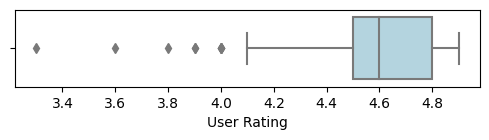

<Figure size 640x480 with 0 Axes>

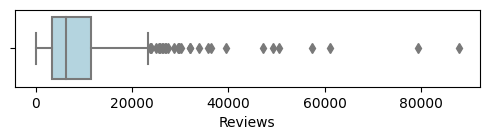

<Figure size 640x480 with 0 Axes>

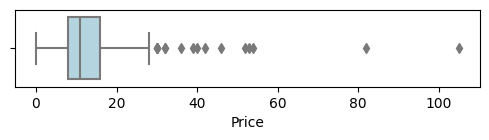

<Figure size 640x480 with 0 Axes>

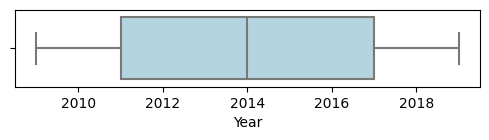

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a box plot for every column in the data
for column in numeric_features:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=data[column], color='lightblue')
    plt.show()
    plt.savefig('boxplot_' + column + '.png')

In [30]:
# Create correlation matrix
corr_matrix = data[numeric_features].corr()
corr_matrix

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.055478,-0.026825,0.237686
Reviews,-0.055478,1.000000,-0.037728,0.317914
Price,-0.026825,-0.037728,1.000000,-0.129217
Year,0.237686,0.317914,-0.129217,1.000000


C:\Users\akash\AppData\Local\Temp\ipykernel_18296\2682037360.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Matrix')

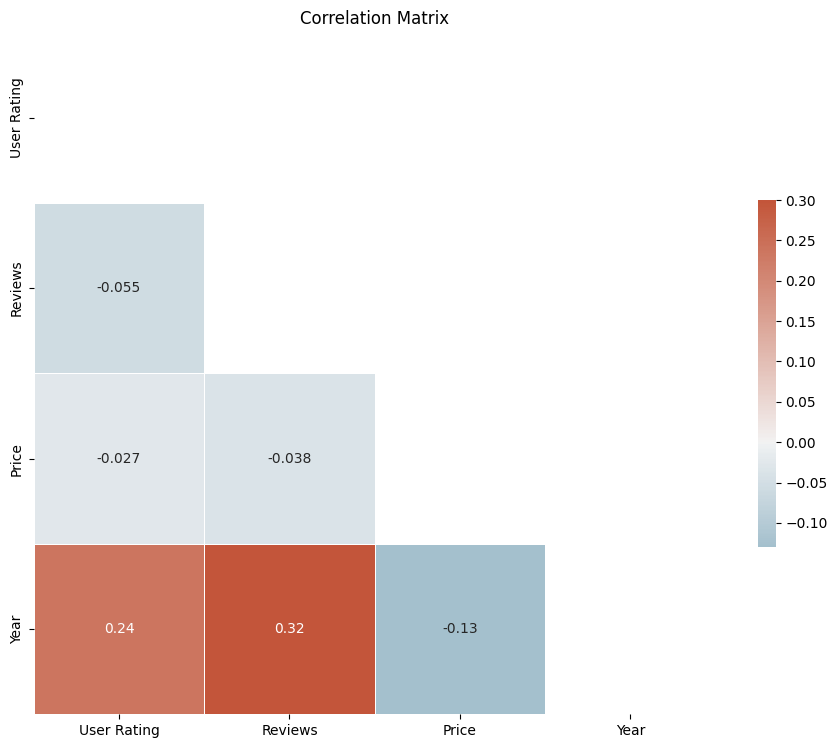

In [31]:
# Graph the Correlation Matrix
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix')

In [32]:
# Find a statistical summary of each column
for column in numeric_features:
    print(column + ' mean: ' + str(data[column].mean()))
    print(column + ' median: ' + str(data[column].median()))
    print(column + ' mode: ' + str(data[column].mode()))
    print(column + ' standard deviation: ' + str(data[column].std()))
    print(column + ' variance: ' + str(data[column].var()))
    print(column + ' max: ' + str(data[column].max()))
    print(column + ' min: ' + str(data[column].min()))
    print(column + ' range: ' + str(data[column].max() - data[column].min()))
    print(column + ' 1st quartile: ' + str(data[column].quantile(.25)))
    print(column + ' 3rd quartile: ' + str(data[column].quantile(.75)))


User Rating mean: 4.6088571428571425
User Rating median: 4.6
User Rating mode: 0    4.8
Name: User Rating, dtype: float64
User Rating standard deviation: 0.22699319541662988
User Rating variance: 0.05152591076545232
User Rating max: 4.9
User Rating min: 3.3
User Rating range: 1.6000000000000005
User Rating 1st quartile: 4.5
User Rating 3rd quartile: 4.8
Reviews mean: 9804.605714285713
Reviews median: 6328.0
Reviews mode: 0     3503
1     3759
2     5505
3     6169
4     7251
5    32122
Name: Reviews, dtype: int64
Reviews standard deviation: 10885.017686398358
Reviews variance: 118483610.03320505
Reviews max: 87841
Reviews min: 37
Reviews range: 87804
Reviews 1st quartile: 3435.25
Reviews 3rd quartile: 11510.25
Price mean: 12.951428571428572
Price median: 11.0
Price mode: 0    9
Name: Price, dtype: int64
Price standard deviation: 9.999451888376145
Price variance: 99.98903806794924
Price max: 105
Price min: 0
Price range: 105
Price 1st quartile: 8.0
Price 3rd quartile: 16.0
Year mean: 20

C:\Users\akash\AppData\Local\Temp\ipykernel_18296\1566921595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


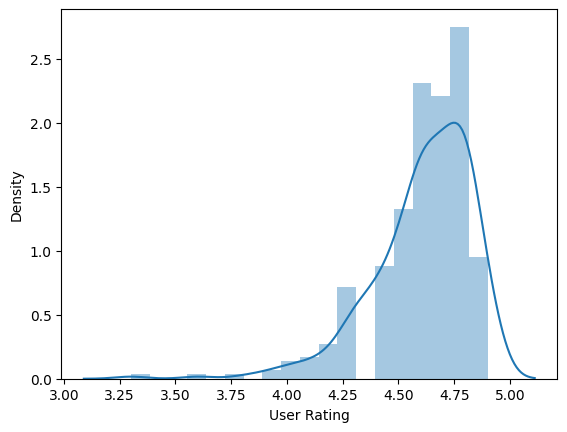

C:\Users\akash\AppData\Local\Temp\ipykernel_18296\1566921595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


<Figure size 640x480 with 0 Axes>

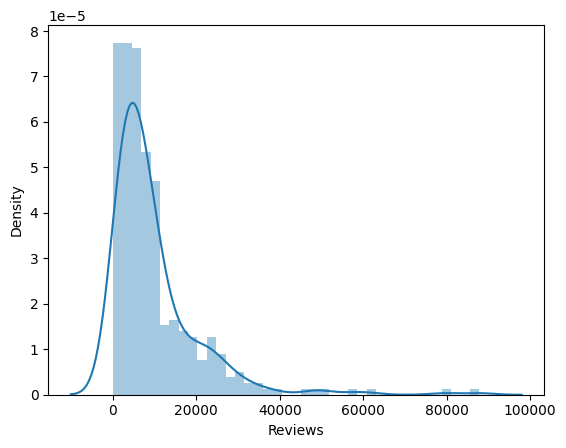

C:\Users\akash\AppData\Local\Temp\ipykernel_18296\1566921595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


<Figure size 640x480 with 0 Axes>

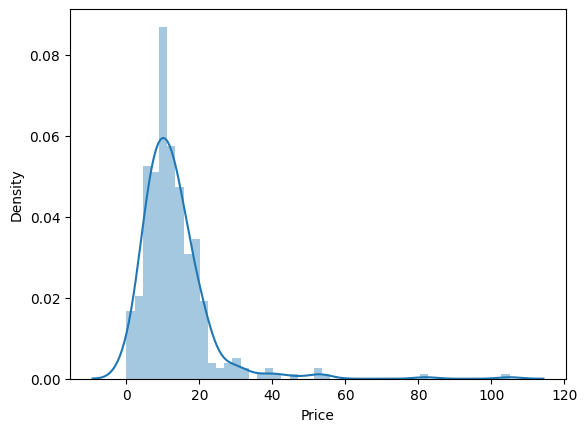

C:\Users\akash\AppData\Local\Temp\ipykernel_18296\1566921595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


<Figure size 640x480 with 0 Axes>

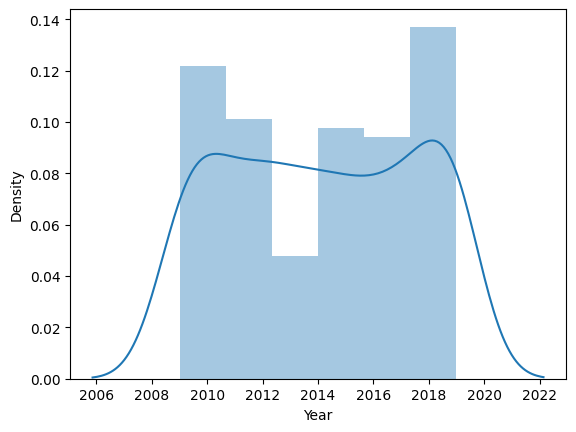

<Figure size 640x480 with 0 Axes>

In [33]:
# Graph the distribution of each column
for column in numeric_features:
    plt.figure()
    sns.distplot(data[column])
    plt.show()
    plt.savefig('distplot_' + column + '.png')

In [35]:
""" # Create a scatter plot of two columns
for column in numeric_features:
    plt.figure()
    sns.scatterplot(x=data[column], y=data['price'])
    plt.show()
    plt.savefig('scatterplot_' + column + '.png') """

KeyError: 'price'

<Figure size 640x480 with 0 Axes>

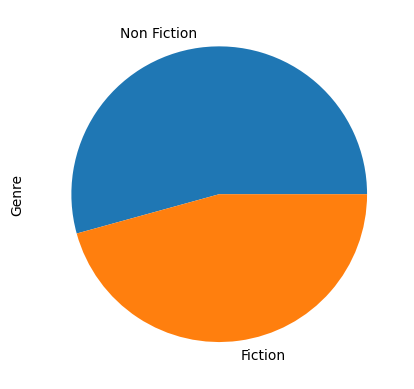

In [36]:
# Make a pie graph with all the genres
plt.figure()
data['Genre'].value_counts().plot.pie()
plt.show()

In [ ]:
""" # Assuming 'data' is your DataFrame containing the 'Genre' column
plt.figure()
sns.set(style="whitegrid")  # This sets the background style

# Count the occurrences of each genre
genre_counts = data['Genre'].value_counts()

# Create a pie chart using Seaborn
sns.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal, so the pie chart looks circular
plt.axis('equal')

# Display the pie chart
plt.show()
 """

AttributeError: module 'seaborn' has no attribute 'pie'

<Figure size 640x480 with 0 Axes>

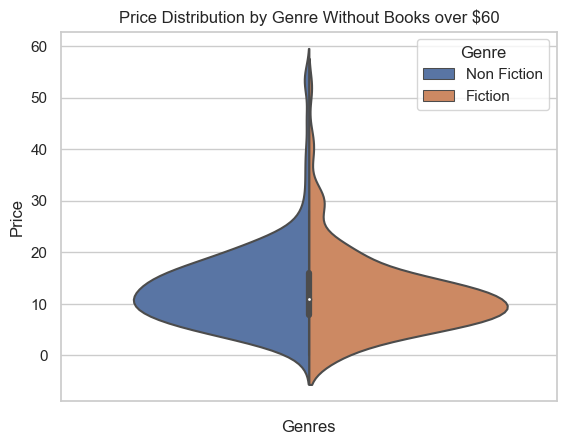

In [37]:
# Make a violin plot for each genre and price
plt.figure()
sns.set(style="whitegrid")
# make a copy of the data and remove the outliers in price
data2 = data.copy()
data2 = data2[data2['Price'] < 60]
data2['Single'] = ''

sns.violinplot(x="Single", y="Price", hue="Genre", split=True, data=data2)
plt.xlabel('Genres')
plt.title('Price Distribution by Genre Without Books over $60')
plt.show()

In [60]:
# get the top 50 books by reviews
top50 = data.sort_values(by=['Reviews'], ascending=False).head(50)
# get the number of fiction and nonfiction books in the top 50
print(top50['Genre'].value_counts())
# make a pie chart of the top 50 books by genre
""" plt.figure()
top50['Genre'].value_counts().plot.pie()
plt.show() """

Fiction        38
Non Fiction    12
Name: Genre, dtype: int64


" plt.figure()\ntop50['Genre'].value_counts().plot.pie()\nplt.show() "

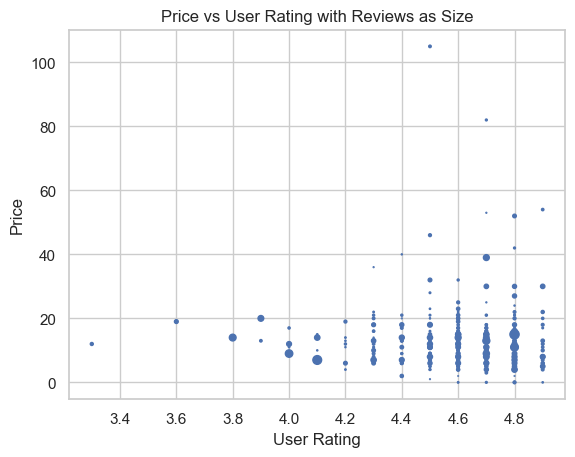

In [38]:
# make a scatter plot of rating (x) vs price (y) with the number of reviews as the size of the point
plt.figure()
plt.scatter(data['User Rating'], data['Price'], s=data['Reviews']/2000)
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price vs User Rating with Reviews as Size')
plt.show()

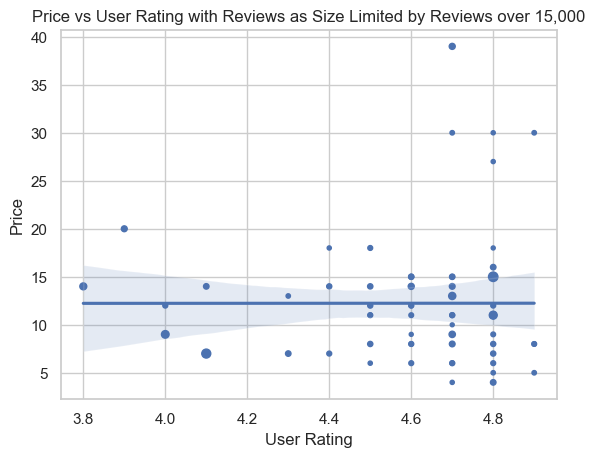

In [39]:
# make a scatter plot of rating (x) vs price (y) with the number of reviews as the size of the point
plt.figure()

data2 = data.copy()
# data2 = data2[data2['Price'] < 60]
# data2 = data2[data2['User Rating'] > 3.75]
data2 = data2[data2['Reviews'] > 15000]

plt.scatter(data2['User Rating'], data2['Price'], s=data2['Reviews']/1900)
# add a regression line
sns.regplot(x=data2['User Rating'], y=data2['Price'], scatter=False)
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price vs User Rating with Reviews as Size Limited by Reviews over 15,000')
plt.show()

In [44]:
# Find the top 50 authors by reviews
top_authors = data.groupby('Author').sum().sort_values(by='Reviews', ascending=False).head(35)
total_reviews = data['Reviews'].sum()
print(total_reviews)
top_authors

3431612


C:\Users\akash\AppData\Local\Temp\ipykernel_18296\2875932709.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_authors = data.groupby('Author').sum().sort_values(by='Reviews', ascending=False).head(35)


,User Rating,Reviews,Price,Year
Author,,,,
E L James,21.6,130746,78,10064
Suzanne Collins,23.4,130548,71,10058
J.K. Rowling,36.4,91764,191,16128
Delia Owens,4.8,87841,15,2019
Paula Hawkins,4.1,79446,7,2016
Jeff Kinney,57.6,67482,111,24163
Michelle Obama,4.8,61133,11,2019
John Grisham,22.0,60961,81,10065
John Green,9.2,58973,20,4028


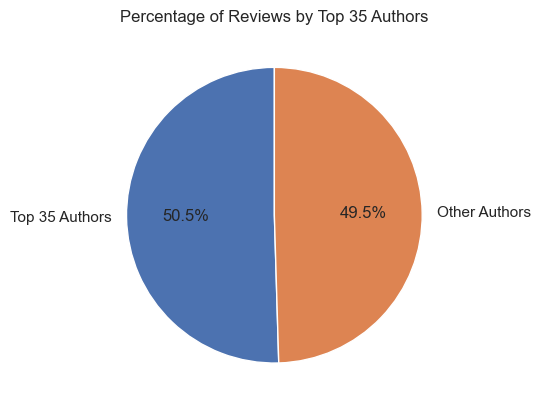

In [46]:
# make a pie chart with the combined reviews of the top 50 authors and the rest
plt.figure()
reviews = {
    'Top 35 Authors': top_authors['Reviews'].sum(),
    'Other Authors': total_reviews - top_authors['Reviews'].sum()
}

plt.pie(reviews.values(), labels=reviews.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Reviews by Top 35 Authors')
plt.show()


In [47]:
# get the total reviews of the 50 highest rated books
top_books_rating = data.sort_values(by='User Rating', ascending=False).head(25)
top_books_rating['Reviews'].sum()

219667

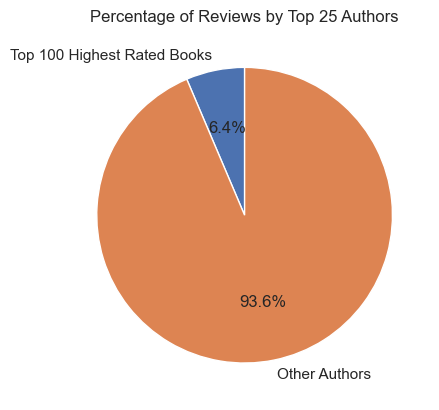

In [48]:
# graph the distribution of the top 100 books by rating
plt.figure()
reviews = {
    'Top 100 Highest Rated Books': top_books_rating['Reviews'].sum(),
    'Other Authors': total_reviews - top_books_rating['Reviews'].sum()
}

plt.pie(reviews.values(), labels=reviews.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Reviews by Top 25 Authors')
plt.show()

In [ ]:
# find all the books that have price 0
free_books = data[data['Price'] == 0]
free_books

,Name,Author,User Rating,Reviews,Price,Year,Genre,Single
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction,
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction,
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction,
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction,
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction,
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction,
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction,
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction,
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction,
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction,
